# 📊 Customer Sentiment Analysis – iPhone 15 (128GB)

# Objective
As a Data Analyst at Flipkart, the task is to analyze customer sentiment related to the iPhone 15 128GB model.
The aim is to:

1.Understand customer opinions,

2.Identify product strengths and weaknesses,

3.Provide actionable insights to support business decisions.

# Tools and Librarie

Selenium: For automating web scraping tasks.

BeautifulSoup: For parsing and extracting data from HTML.

Pandas: For data cleaning, manipulation, and analysis.

TextBlob: For performing sentiment analysis.

Matplotlib & Seaborn: For creating data visualizations.

# 1. Data Collection (Web Scraping):

• Tools: Selenium, BeautifulSoup
• Steps:
    
    – Use Selenium to scrape at least 300 reviews from Flipkart's iPhone 15 128GB
      product page.

    – Extract Username, Rating, and Review Text.

    – Handle pagination to collect reviews from multiple pages

In [1]:
# Import the necessary librariess
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [2]:
# Create empty lists to store the user data such as Name, City, Date
#of Purchase, Review & Rating
Names = []
Cities = []
Dates = []
Reviews = []
Ratings = []

In [3]:
# Assign the url of the flipkart website and use selenium to scrape data

url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZYCQQXYH&marketplace=FLIPKART&page=1"

# Initialize a new Chrome browser session
driver = webdriver.Chrome()

# Open the specified URL in the browser
driver.get(url)


# Keep scraping data until at least 320 names are collected
while len(Names) < 320:
    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    # Extract names
    names_elements= soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in names_elements:
        Names.append(name.text)
    # Extract cities
    city_elements = soup.find_all("p", {"class": "MztJPv"})
    for city in city_elements:
        Cities.append(city.text)
    # Extract dates
    dates_elements = soup.find_all("p", {"class": "_2NsDsF"})
    for date in dates_elements:
        Dates.append(date.text)
    Actual_Dates = Dates[1::2]
    # Extract reviews
    reviews_elements = soup.find_all("div", {"class": "ZmyHeo"})
    for review in reviews_elements:
        Reviews.append(review.text)
    # Extract ratings
    ratings_elements = soup.find_all("div", class_ = "XQDdHH Ga3i8K")
    for ratings in ratings_elements:
        Ratings.append(ratings.text)
    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH,"//span[text()='Next']")
        next_button.click()
        time.sleep(2)
    except:
        break
        
print(len(Names))
print(len(Cities))
print(len(Actual_Dates))
print(len(Reviews))
print(len(Ratings)) 


320
320
320
320
320


In [4]:
# Combine data into a DataFrame
df = pd.DataFrame({
 "Name": Names,
 "City": Cities,
 "Date": Actual_Dates,
 "Review": Reviews,
 "Ratings":Ratings
})


In [5]:
df.to_csv("flipkart_reviews.csv", index=False)


# 2. Data Cleaning and Preprocessing:

# • Tool: Pandas

• Steps:
    
    – Remove duplicates and handle missing values.
    
    – Text Preprocessing:
        
            • Convert text to lowercase, remove special characters, and 
              extra spaces.
            • Tokenize text, remove stop words, and applylemmatization.

In [6]:
# Check the basic info of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     320 non-null    object
 1   City     320 non-null    object
 2   Date     320 non-null    object
 3   Review   320 non-null    object
 4   Ratings  320 non-null    object
dtypes: object(5)
memory usage: 12.6+ KB


In [7]:
# Drop the duplicates from the dataframe
df1 = df.copy()
df1 = df1.drop_duplicates()
df1


,Name,City,Date,Review,Ratings
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,bijaya mohanty,"Certified Buyer, Baleshwar",11 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
...,...,...,...,...,...
315,Mayur Mahajan,"Certified Buyer, Shirdi","Jan, 2024",It's good to be transfer iphone 11 to 15 and b...,5
316,sai viswanath,"Certified Buyer, Proddatur","Jan, 2024",The camera is so beautiful and it takes good p...,5
317,Manish sinha,"Certified Buyer, Panipat","Jan, 2024",I love itREAD MORE,5
318,Sumit samal,"Certified Buyer, Malkangiri","Jan, 2024","Just take it without asking anyone,READ MORE",5


In [8]:
# Convert the Name column data into Title Case
df1['Name'] = df1['Name'].str.title()
df1.head()


,Name,City,Date,Review,Ratings
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,Bijaya Mohanty,"Certified Buyer, Baleshwar",11 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5


In [9]:
# Clean data of City column by removing unwanted characters/ part ofstring
df1['City'] = df1['City'].str.replace("Certified Buyer, ", "", regex=False).str.strip()
df1.head()

,Name,City,Date,Review,Ratings
0,Ajin V,Balaghat,"Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",Very niceREAD MORE,4
2,Bijaya Mohanty,Baleshwar,11 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Nikhil Kumar,Meerut Division,"Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
4,Prithivi Boruah,Bokajan,"Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5


In [10]:
# Clean data of Review column by removing unwanted characters/ part ofstring and converting to lowercase
df1['Review'] = df1['Review'].str.lower().str.replace("read more", "",regex=False)
df1.head()


,Name,City,Date,Review,Ratings
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4
2,Bijaya Mohanty,Baleshwar,11 months ago,just go for it.amazing one.beautiful camera wi...,5
3,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5
4,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5


# 3. Sentiment Analysis:

# • Tool: TextBlob

• Tool: TextBlob
• Steps:
    – Analyze sentiment using TextBlob’s polarity score (-1 to +1).
    – Classify sentiment:
        • Positive: Polarity ≥ 0.1
        • Negative: Polarity < 0.1
    – Store sentiment classification in the dataset.

In [11]:
# Import libraries for Sentimental analysis of review sentences
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Create a column called Reviews_t that stores tokenized sentences from the Review column using the sent_tokenize function.
df1["Reviews_t"] = df1['Review'].apply(sent_tokenize)
df1


,Name,City,Date,Review,Ratings,Reviews_t
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍]
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice]
2,Bijaya Mohanty,Baleshwar,11 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...
3,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...
4,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it]
...,...,...,...,...,...,...
315,Mayur Mahajan,Shirdi,"Jan, 2024",it's good to be transfer iphone 11 to 15 and b...,5,[it's good to be transfer iphone 11 to 15 and ...
316,Sai Viswanath,Proddatur,"Jan, 2024",the camera is so beautiful and it takes good p...,5,[the camera is so beautiful and it takes good ...
317,Manish Sinha,Panipat,"Jan, 2024",i love it,5,[i love it]
318,Sumit Samal,Malkangiri,"Jan, 2024","just take it without asking anyone,",5,"[just take it without asking anyone,]"


In [13]:
# Import mean from statistics for basic statistics
from statistics import mean
# Function created for assigning Polarity to the Reviews_t column
def get_polarity(sentences):
     return [TextBlob(sentence).sentiment.polarity for sentence in
sentences]

In [14]:
# Calls get_polarity function on the Reviews_t column to assign polarity
df1['Polarity'] = df1['Reviews_t'].apply(get_polarity)
df1

,Name,City,Date,Review,Ratings,Reviews_t,Polarity
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16]
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78]
2,Bijaya Mohanty,Baleshwar,11 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666]
3,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]"
4,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6]
...,...,...,...,...,...,...,...
315,Mayur Mahajan,Shirdi,"Jan, 2024",it's good to be transfer iphone 11 to 15 and b...,5,[it's good to be transfer iphone 11 to 15 and ...,[0.85]
316,Sai Viswanath,Proddatur,"Jan, 2024",the camera is so beautiful and it takes good p...,5,[the camera is so beautiful and it takes good ...,[0.7749999999999999]
317,Manish Sinha,Panipat,"Jan, 2024",i love it,5,[i love it],[0.5]
318,Sumit Samal,Malkangiri,"Jan, 2024","just take it without asking anyone,",5,"[just take it without asking anyone,]",[0.0]


In [15]:
# Function created to calculate the average polarity of each review
#(Average of polarity for each sentences in a review)
def calculate_average_polarity(polarities):
     return mean(polarities) if polarities else 0


In [16]:
# Calls calculate_average_polarity function on the Polarity column toassign the average polarity for each review
df1['Average_Polarity'] = df1['Polarity'].apply(calculate_average_polarity)
df1['Average_Polarity'] = df1['Average_Polarity'].round(2)
df1.head(10)

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78
2,Bijaya Mohanty,Baleshwar,11 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27
3,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50
4,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60
5,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68
6,Flipkart Customer,Aizawl,"Jan, 2024",awesome photography experience. battery backup...,5,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.73
7,Saurabh Gothwad,Paradip,"Sep, 2023",simply premium.,5,[simply premium.],[0.0],0.00
8,Sheetla Prasad Maurya,Sultanpur,"Oct, 2023",best mobile phonecamera quality is very nice b...,4,[best mobile phonecamera quality is very nice ...,[0.738],0.74
9,Rahul Shedge,Satara,"Oct, 2023",totally happy!camera 5battery 5 display 5design 5,5,[totally happy!camera 5battery 5 display 5desi...,[0.0],0.00


In [17]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
     if polarity > 0.75:
        return 'extremely positive'
     elif 0 < polarity <= 0.75:
        return 'positive'
     elif polarity == 0:
        return 'neutral'
     elif -0.75 <= polarity < 0:
        return 'negative'
     else:
        return 'extremely negative'

In [18]:
# Calls sentiment_class function on the Average_Polarit column toassign the sentiment class
df1['Sentiment_Class'] = df1['Average_Polarity'].apply(sentiment_class)
df1.head()

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16,positive
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78,extremely positive
2,Bijaya Mohanty,Baleshwar,11 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27,positive
3,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50,positive
4,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60,positive


In [19]:
# Calculates and prints the overall average polarity score of the entire dataset of reviews
polarity_score = df1['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')
if polarity_score > 0.75:
    print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')

Average Polarity Score : 0.47
The Average Polarity Score is Positive


# 4. Data Analysis and Insights:

# • Tools: Pandas, Matplotlib/Seaborn

• Steps:

    – Sentiment Distribution: Calculate positive and negative sentiment      proportions.
    
    – Average Rating vs Sentiment: Analyze correlation between numeric       ratings (1-5 stars) and sentiment.
    
    – Word Cloud: Generate a word cloud for frequently mentioned words       in positive/negative reviews.
    
    – Review Length Analysis: Investigate the relationship between           review length and sentiment.

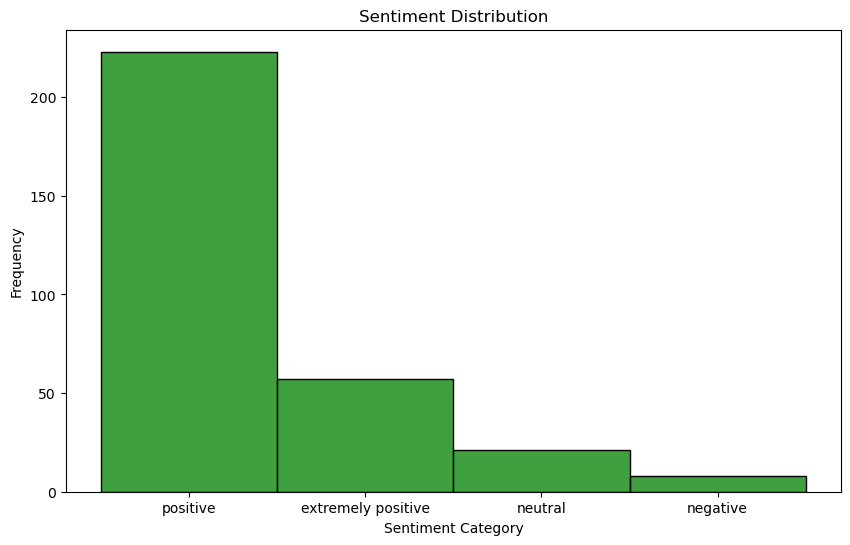

In [20]:
# Imports libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6))
sns.histplot(x=df1.Sentiment_Class, color='green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Sentiment Distribution

The bar chart visualizes the distribution of sentiment categories in the dataset. The x-axis
represents various sentiment categories, and the y-axis shows the frequency of occurrences in
each category. The categories are as follows:

1. Positive: The most frequent sentiment, with over 200 instances.
2. Extremely Positive: This category follows, though it appears much less frequently than
"Positive".
3. Neutral: Appears less often than both positive categories.
4. Negative: The least frequent sentiment in the dataset.

The chart clearly demonstrates a strong inclination towards positive sentiments, with "Positive"
being the predominant category, followed by "Extremely Positive". Both neutral and negative
sentiments occur much less frequently.

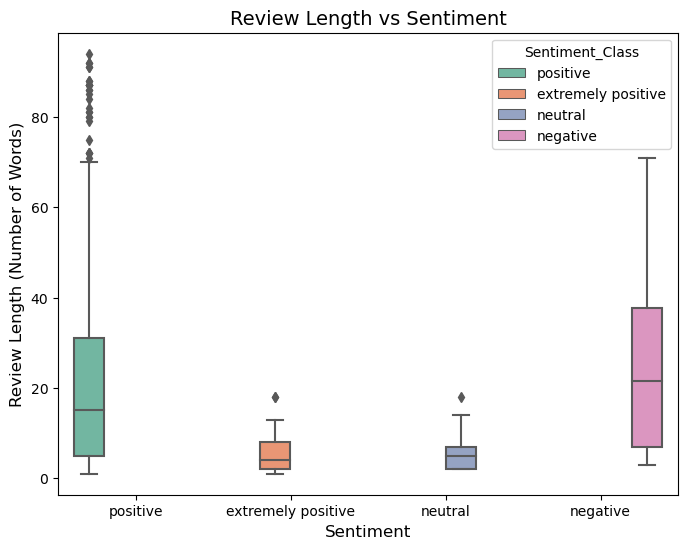

In [21]:
df1['Review_Length'] = df1['Review'].apply(lambda x: len(x.split()))
# Box Plot for Review Length by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df1, hue =
'Sentiment_Class', palette='Set2')
plt.title('Review Length vs Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (Number of Words)', fontsize=12)
plt.show()

# Review Length Vs Sentiment

Correlation:
• Reviews with more positive sentiment tend to align with higher ratings (e.g., 4.5–5
stars), as demonstrated by the clustering and color gradient.


Neutral Reviews:
• Neutral reviews are spread across various ratings, suggesting that sentiment does not
always align with the assigned star rating.


Negative Reviews:
• Negative and extremely negative reviews typically receive lower ratings, but they can
still vary due to individual reviewer perspectives and subjective interpretation.

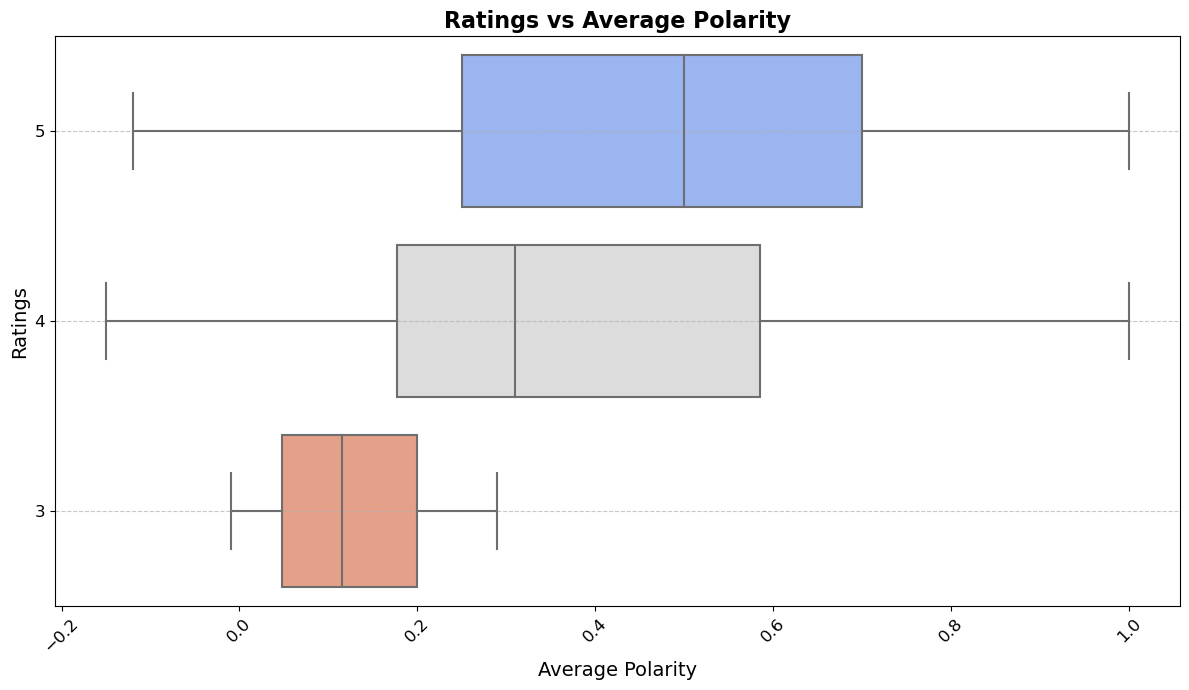

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df1,
    x='Average_Polarity',
    y='Ratings',
    palette='coolwarm',
    showfliers=False  # Hide outliers for cleaner boxplot
)

plt.title('Ratings vs Average Polarity', fontsize=16, fontweight='bold')
plt.xlabel('Average Polarity', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Ratings vs Average Polarity:

Positive Sentiment:
• Shows the widest variation in review length, with a few notable outliers.
• The median review length is higher than that of other sentiment categories.



Extremely Positive Sentiment:
• Has the shortest overall review lengths, with a tighter distribution and fewer outliers.

Neutral Sentiment:
• Displays a narrower range of review lengths, similar to the "Extremely Positive"
sentiment group.

Negative Sentiment:
• Exhibits a moderate range of review lengths.
• The median length is shorter than "Positive" but longer than both "Extremely Positive"
and "Neutral."


Interpretation:
• Positive reviews are generally more detailed (longer) compared to other sentiment
categories.
• Extremely positive and neutral reviews are typically short.
• Negative reviews vary in length but tend to be more concise than positive ones.

# 5. Reporting:

Summarize findings, including:

– Overview of data collection and cleaning.

– Sentiment Analysis Results: Distribution of sentiments, average sentiment per
rating.

– Insights: Key trends, issues, and positive highlights.

– Recommendations: Based on sentiment, suggest areas for product improvement or marketing.

Sentiment Analysis Report: Customer Reviews of the iPhone 15 128GB on Flipkart

1. Data Collection and Cleaning Process


Data Source: Customer reviews for the iPhone 15 128GB were gathered from Flipkart
using web scraping techniques with tools such as Selenium and BeautifulSoup.

Data Preparation:
    
– The reviews were preprocessed by removing unnecessary characters,
standardizing text formatting, and eliminating excess spaces.

– Text data was tokenized to prepare it for further analysis.

– Sentiments were categorized into different labels (e.g., positive, extremely
positive, neutral, negative, extremely negative) using sentiment analysis
methods.


2. Sentiment Analysis Findings

Sentiment Breakdown:


– A majority of the reviews expressed positive sentiment, followed by a smaller
share of extremely positive feedback, as shown in the sentiment distribution
chart.

– Neutral and negative reviews represented a much smaller percentage of the total
feedback

Sentiment by Rating:

-Higher star ratings were generally associated with positive or extremely positive
sentiments.

– Lower star ratings tended to correspond with more neutral or negative feedback,
signaling dissatisfaction among those customers.

3. Key Insights

Positive Aspects:
    
– Customers frequently praised the design, camera quality, and overall
performance of the iPhone 15.

– Many reviews highlighted improvements in battery life as a notable positive
feature.

• Common Complaints*:
    
– Neutral and negative reviews often pointed to pricing issues and occasional
problems with delivery or packaging.

– A few customers mentioned compatibility problems with certain accessories and
minor software glitches.

4. Recommendations

Product Enhancements

– Address minor software glitches mentioned by users to improve overall
experience.

– Look into compatibility issues with accessories to ensure that users have a smooth and hassle-free experience.

Marketing Suggestions

– Emphasize the camera quality, battery life, and sleek design in future marketing
campaigns.

– Mitigate pricing concerns by offering EMI options, exchange offers, or timelimited discounts to make the product more accessible.

Operational Improvements

– Focus on enhancing delivery services to reduce complaints related to packaging or shipping delays.

– Keep a close eye on customer feedback to swiftly identify and resolve any new issues that arise.

 ----------------------------------------------------------------------
              Thank You
-----------------------------------------------------------------------    